# Day 67

Today I'm going to look at passing yards per passing touchdown on a team level. Basically, I want to see how efficient teams are in the air. Are there any teams that seem to be outperforming? Underperforming? How about on a historical basis?

In [3]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns

sns.set_palette('deep')

# Create database connection
conn = sqlite3.connect('../../data/db/database_test.db')

## Season-Level

In [4]:
query = f"""
SELECT
    team,
    SUM(passing_yards) AS sum_pass_yds,
    SUM(passing_tds) AS sum_pass_tds,
    ROUND((SUM(passing_yards) / SUM(passing_tds)), 2) AS yds_per_pass_td
FROM
(
    SELECT
        team,
        week,
        SUM(passing_yards) AS passing_yards,
        SUM(passing_tds) AS passing_tds,
        ROUND((SUM(passing_yards) / SUM(passing_tds)), 2) AS yds_per_pass_td
    FROM
    (
        SELECT
            player_display_name AS player_name,
            recent_team AS team,
            week,
            passing_yards,
            passing_tds,
            (passing_yards / passing_tds) AS yds_per_pass_td
            -- SUM(passing_yards) OVER(PARTITION BY recent_team, week)/ SUM(passing_tds) OVER(PARTITION BY recent_team, week) AS yds_per_pass_td
        FROM weekly
        WHERE position = 'QB'
            -- AND attempts >= 15
            AND season = 2022
            AND week <= 16
            -- AND team IN ('ARI')
    ) AS team_player_week_level
    GROUP BY team, week
    ORDER BY team, week
) AS team_week_level
GROUP BY team
ORDER BY yds_per_pass_td ASC
"""

df = pd.read_sql(query, conn)
df

,team,sum_pass_yds,sum_pass_tds,yds_per_pass_td
0,CIN,4282.0,34,125.94
1,BUF,4037.0,32,126.16
2,KC,4720.0,37,127.57
3,CHI,2376.0,17,139.76
4,DAL,3501.0,25,140.04
5,GB,3517.0,25,140.68
6,SEA,3886.0,27,143.93
7,SF,3553.0,24,148.04
8,LV,3594.0,24,149.75
9,WAS,3471.0,23,150.91


In [5]:
df.describe()

,sum_pass_yds,sum_pass_tds,yds_per_pass_td
count,32.000000,32.000000,32.000000
mean,3542.593750,20.656250,185.021875
std,545.206848,6.837323,52.785978
min,2376.000000,9.000000,125.940000
25%,3272.000000,14.000000,149.322500
50%,3510.500000,21.000000,160.275000
75%,3904.250000,25.000000,220.220000
max,4720.000000,37.000000,365.890000


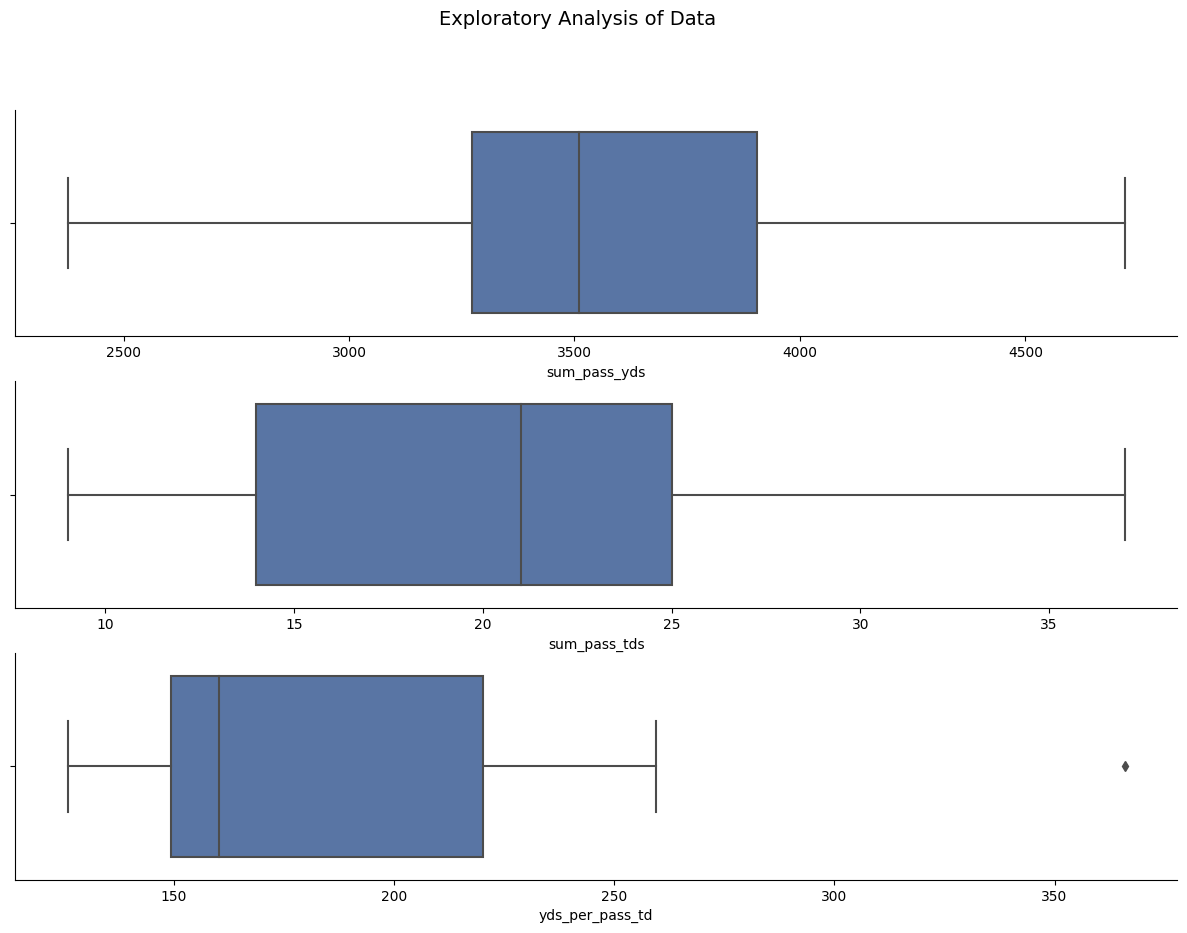

In [18]:
# Plot setup
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize = (15, 10))

plot_config = {
    'sum_pass_yds':ax0,
    'sum_pass_tds':ax1,
    'yds_per_pass_td':ax2,
}

# Plot
for col, ax in plot_config.items():
    sns.boxplot(x=col,
                data=df,
                # whis=[5,95],
                ax=ax)

# Add Title
fig.suptitle('Exploratory Analysis of Data', size=14)

sns.despine()
plt.show()

We can see that Pittsburgh's yards per passing touchdown through Week 16 of the 2022 NFL season is an outlier and it makes sense – it takes them over 100 **more** yards to throw a TD, on average, than the next worse team. That's an entire football field!

## Last 4 Weeks (Weeks 13-16)

In [19]:
query = f"""
SELECT
    team,
    SUM(passing_yards) AS sum_pass_yds,
    SUM(passing_tds) AS sum_pass_tds,
    ROUND((SUM(passing_yards) / SUM(passing_tds)), 2) AS yds_per_pass_td
FROM
(
    SELECT
        team,
        week,
        SUM(passing_yards) AS passing_yards,
        SUM(passing_tds) AS passing_tds,
        ROUND((SUM(passing_yards) / SUM(passing_tds)), 2) AS yds_per_pass_td
    FROM
    (
        SELECT
            player_display_name AS player_name,
            recent_team AS team,
            week,
            passing_yards,
            passing_tds,
            (passing_yards / passing_tds) AS yds_per_pass_td
            -- SUM(passing_yards) OVER(PARTITION BY recent_team, week)/ SUM(passing_tds) OVER(PARTITION BY recent_team, week) AS yds_per_pass_td
        FROM weekly
        WHERE position = 'QB'
            -- AND attempts >= 15
            AND season = 2022
            AND week BETWEEN 13 AND 16
            -- AND team IN ('ARI')
    ) AS team_player_week_level
    GROUP BY team, week
    ORDER BY team, week
) AS team_week_level
GROUP BY team
ORDER BY yds_per_pass_td ASC
"""

df = pd.read_sql(query, conn)
df

,team,sum_pass_yds,sum_pass_tds,yds_per_pass_td
0,ARI,645.0,0,NaN
1,BUF,846.0,9,94.00
2,CIN,1100.0,11,100.00
3,DAL,1057.0,10,105.70
4,SF,912.0,8,114.00
5,LV,792.0,6,132.00
6,SEA,1084.0,8,135.50
7,WAS,813.0,6,135.50
8,MIN,1357.0,10,135.70
9,JAX,1100.0,8,137.50


In [20]:
df.describe()

,sum_pass_yds,sum_pass_tds,yds_per_pass_td
count,32.000000,32.000000,31.000000
mean,879.968750,5.125000,223.027419
std,254.558883,3.024097,143.692000
min,472.000000,0.000000,94.000000
25%,683.500000,3.000000,136.600000
50%,871.000000,4.500000,164.000000
75%,1100.000000,8.000000,229.585000
max,1357.000000,11.000000,625.000000


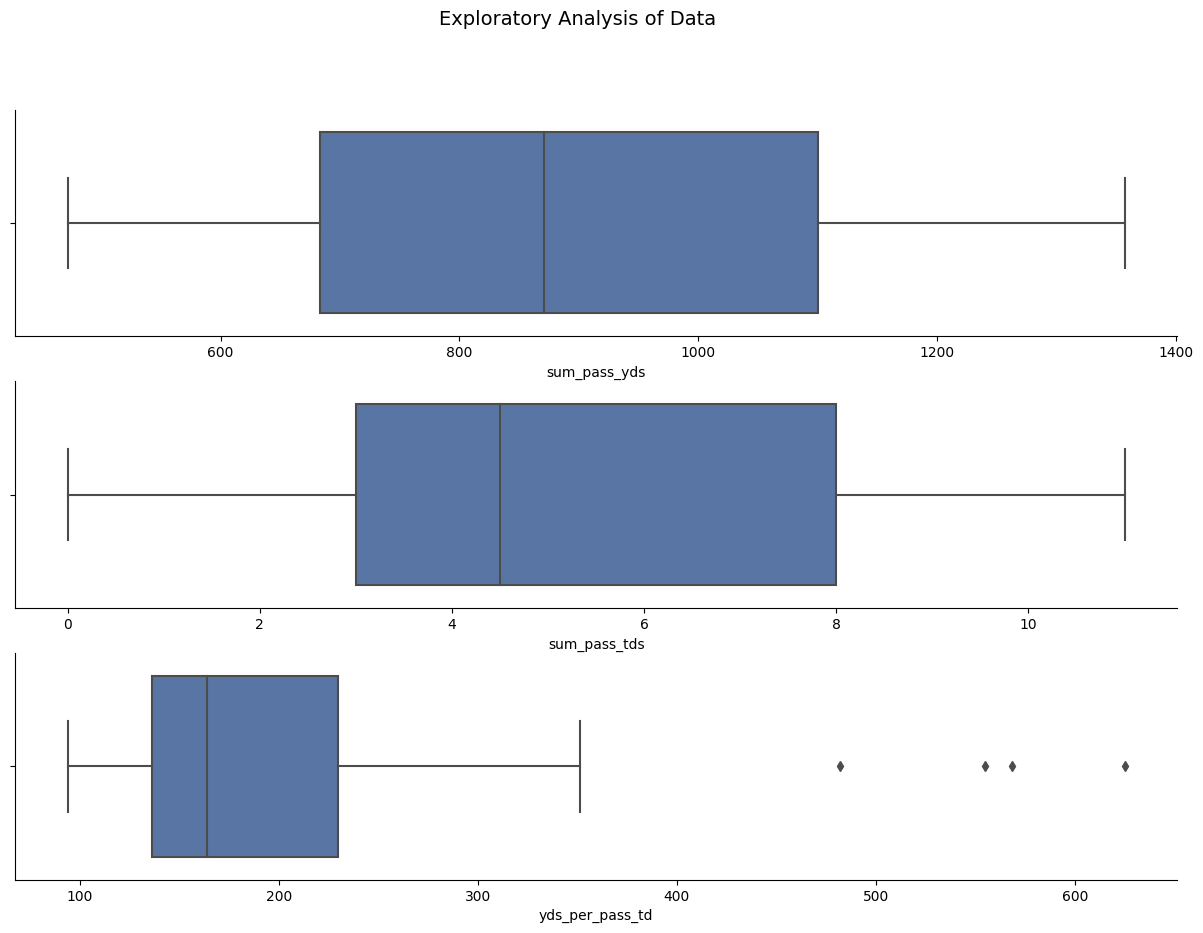

In [21]:
# Plot setup
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize = (15, 10))

plot_config = {
    'sum_pass_yds':ax0,
    'sum_pass_tds':ax1,
    'yds_per_pass_td':ax2,
}

# Plot
for col, ax in plot_config.items():
    sns.boxplot(x=col,
                data=df,
                # whis=[5,95],
                ax=ax)

# Add Title
fig.suptitle('Exploratory Analysis of Data', size=14)

sns.despine()
plt.show()

When we look at the last 4 weeks of the season, we see even more underperformers. Atlanta, Baltimore NY Jets, and the LA Chargers. 